In [2]:
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
import time
%matplotlib inline

# 1.  NumPy и векторизация 

В этом задании вам предлагается выполнить 6 задач для знакомства с библиотекой NumPy и веткоризованными вычислениями.

В каждой задаче требуется:
1. Реализовать функцию, генерирущую случайные входные данные. Среди параметров генерации обязательно должны быть размеры входных данных.

1. Реализовать две функции-решения: первая функция должна реализовывать наивное решение  с использованием стандартных средств языка Python и без NumPy, вторая функция должна реализовывать наиболее эффективное решение с использованием векторизованных функций NumPy.

1. Провести запуск решений на данных разных размеров убедиться, что выходные значения функций совпадают с достаточной точностью

1. Замерить время работы каждого решения. Отобразить результаты замеров на графике средствами библиотеки matplotlib.

В качестве образца можно использовать решение задачи №0.

Советуем обратить внимания на следующие функции NumPy:

np.zeros, np.ones, np.diag, np.eye, np.arange, np.linspace, np.meshgrid,
np.random.random, np.random.randint, np.shape, np.reshape, np.transpose, np.any, np.all, np.nonzero, np.where,
np.sum, np.cumsum, np.prod, np.diff, np.min, np.max, np.minimum, np.maximum, np.argmin, np.argmax, np.unique,
np.sort, np.argsort, np.bincount, np.ravel, np.newaxis, np.dot



## Задача №0 (пример)
Дана матрица $X$ размера $N \times M$, требуется вычислить сумму значений в каждой строке матрицы.

In [8]:
#Генерация случайной матрицы
def task1_gen(N, M):
    X = np.random.random(size=(N, M))
    return X

#Решение в лоб
def task1_dummy(X):
    ans = []
    for i in range(X.shape[0]):
        cur = 0.0
        for j in range(X.shape[1]):
            cur += X[i, j]
        ans.append(cur)
    return ans

#Решение с векторизацией
def task1_vec(X):
    return np.sum(X, axis=1)

In [32]:
params = [(100, 10), (500, 20), (1000, 1000), (50000, 15), (50000, 50), (50000, 100), (50000, 2000)]
t1 = []
t2 = []
labels = []
for p in params:
    
    labels.append("N=%d, M=%d" % (p[0], p[1]))
    
    X = task1_gen(*p)
    
    stamp = time.time()
    R1 = task1_dummy(X)
    t1.append(time.time() - stamp)
    
    stamp = time.time()
    R2 = task1_vec(X)
    t2.append(time.time() - stamp)
    print('Params: %20s. Dummy time: %7.4f. Vec time: %7.4f. Error: %10g.' % 
          (labels[-1], t1[-1], t2[-1], np.max(R1 - R2)))
    

Params:          N=100, M=10. Dummy time:  0.0012. Vec time:  0.0001. Error: 1.77636e-15.
Params:          N=500, M=20. Dummy time:  0.0022. Vec time:  0.0001. Error: 3.55271e-15.
Params:       N=1000, M=1000. Dummy time:  0.2291. Vec time:  0.0007. Error: 1.13687e-12.
Params:        N=50000, M=15. Dummy time:  0.1625. Vec time:  0.0012. Error: 3.55271e-15.
Params:        N=50000, M=50. Dummy time:  0.5340. Vec time:  0.0020. Error: 2.13163e-14.
Params:       N=50000, M=100. Dummy time:  1.0236. Vec time:  0.0033. Error: 6.39488e-14.
Params:      N=50000, M=2000. Dummy time: 21.1813. Vec time:  0.0648. Error: 6.0254e-12.


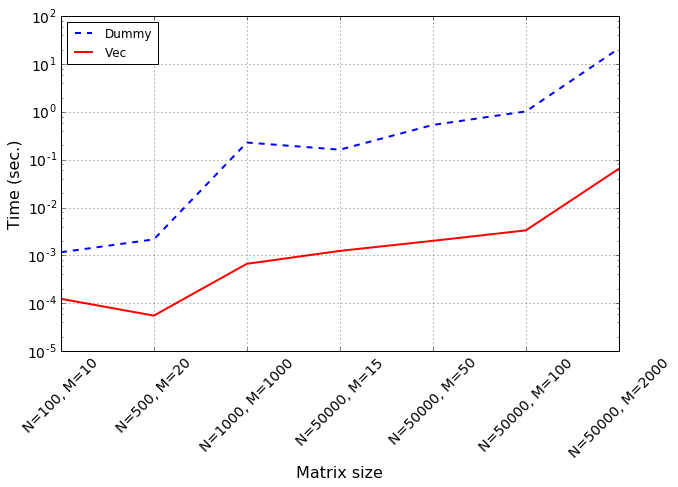

In [38]:
plt.figure(figsize=(10, 6))
plt.semilogy(t1, 'b--', linewidth=2, label='Dummy')
plt.semilogy(t2, 'r-', linewidth=2, label='Vec')
plt.yticks(fontsize=14)
plt.xticks(range(len(labels)), labels, rotation=45, fontsize=14)
plt.xlabel('Matrix size', fontsize=16)
plt.ylabel('Time (sec.)', fontsize=16)
plt.legend(loc=2)
plt.grid()
plt.show()

## Задача №1
Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы $X$.

Для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ 3.

## Задача №2

Дана матрица $X$ и два вектора одинаковой длины $i$ и $j$. 

Построить вектор np.array([X[i[0], j[0]], X[i[1], j[1]], . . . , X[i[N-1], j[N-1]]])

## Задача №3

Даны два вектора x и y. 

Проверить, задают ли они одно и то же мультимножество. 

Для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ True.

## Задача №4
Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. 

Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ 5.

## Задача №5
Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels.

Сложить каналы изображения с указанными весами, и вернуть результат в
виде матрицы размера (height, width). 

Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow: conda install pillow).

Преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587,
0.114]).


В качетсве тестового изображение можно использовать енота из scipy.misc :)

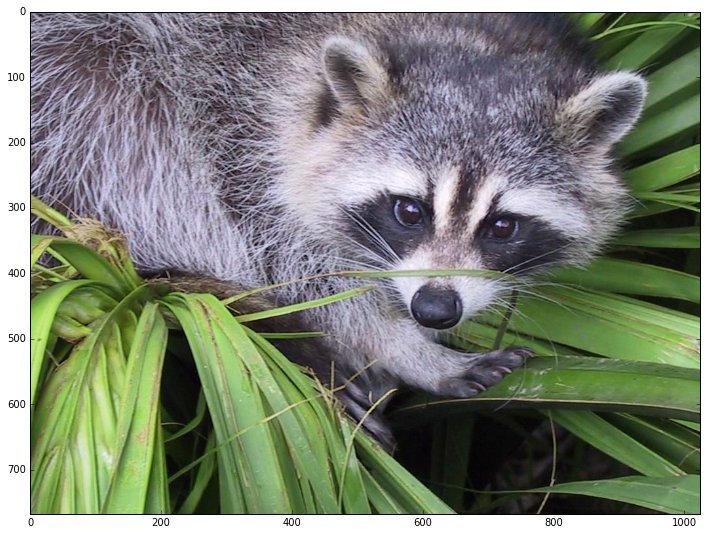

In [40]:
plt.figure(figsize=(12, 9))
img = scipy.misc.face()
plt.imshow(img)
plt.show()

## Задача №6
Даны две выборки объектов &ndash; $X$ и $Y$ в виде матриц с размерами $N \times D$ и $M \times D$.

($N$ и $M$ &ndash; количетсво объектов выборках, $D$ &ndash; размерность пространства)

Вычислить матрицу евклидовых расстояний между объектами. 

Сравнить с функцией scipy.spatial.distance.cdist.

# 2. Word2Vec
В этом задании вам предлагается поработать с обученными векторными представлениями слов, построенными с помощью word2vec.

В файле './w2v/words.txt' находится список слов, на которых была обучена модель.

В файле './w2v/w2v.npz' находятся векторные представления слов в формате npz.

Ниже приведен пример загрузки данных.

Требуется реализовать функцию most_similar(x, k=10), которая возвращает $k$ слов, векторные представления которых находятся ближе всего к заданному вектору $x$ по косинусому расстоянию.

Косинусное расстояние между векторами $x$ и $y$ вычисляется по формуле:

$$
    \rho(x, y) = 1 - cos(\widehat{x,y}) = 1 - \frac{\left<x, y \right>}{|x| \cdot |y|}.
$$

Найдите слова, заданные следующими "арифметическими" выражениями:
* "putin" - "russia" + "america"
* "king" - "man" + "women"
* "paris" - "france" + "italy"

Найдите самое забавное выражение со словами :)


In [3]:
vecf = np.load('./w2v/w2v.npz')
vectors = vecf['vecs']


namesf = open('./w2v/words.txt')
words = list(map(lambda x: x.strip(), namesf.readlines()))

In [4]:
words[:10]

['tripolitan',
 'ftdna',
 'ascolais',
 'phintella',
 'nualart',
 'maderista',
 'lophiiform',
 'ampélographie',
 'boncea',
 'burkejimmy']

In [5]:
vectors.shape

(2029819, 100)